In [3]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "carlndatas"

## 1 Summarization
## Load the data set carIns final. It already has the imputation of missing values.
1. Using the package dplyr, answer the following questions: a) Obtain the number of cars by bodyStyle.

In [4]:
load("/kaggle/input/carlndatas/carIns_final.Rdata")
library(dplyr)

car_counts <- carIns_final %>%
  group_by(bodyStyle) %>%
  summarise(number_of_cars = n())

car_counts


bodyStyle,number_of_cars
<fct>,<int>
convertible,6
hardtop,8
hatchback,70
sedan,96
wagon,25


## (b) Obtain the number of cars by bodyStyle and fuelType.

In [5]:
library(dplyr)

car_counts <- carIns_final %>%
  group_by(bodyStyle, fuelType) %>%
  summarise(number_of_cars = n(), .groups = "drop")

car_counts

bodyStyle,fuelType,number_of_cars
<fct>,<fct>,<int>
convertible,gas,6
hardtop,diesel,1
hardtop,gas,7
hatchback,diesel,1
hatchback,gas,69
sedan,diesel,15
sedan,gas,81
wagon,diesel,3
wagon,gas,22


## (c) Obtain the mean and the standard deviation of the attribute cityMpg by bodyStyle in ascending order

In [6]:
library(dplyr)

car_stats <- carIns_final %>%
  group_by(bodyStyle) %>%
  summarise(media_cityMpg = mean(cityMpg),
            desviacion_std_cityMpg = sd(cityMpg)) %>%
  arrange(media_cityMpg)

car_stats


bodyStyle,media_cityMpg,desviacion_std_cityMpg
<fct>,<dbl>,<dbl>
convertible,20.50000,3.391165
hardtop,21.62500,5.423165
wagon,24.04000,4.217819
sedan,25.32292,6.599035
hatchback,26.31429,7.169870


## (d) Also by bodyStyle, and for the attributes cityMpg and highwayMpg, obtain the mean, the standard deviation, the median and the inter-quartile range.

In [7]:
library(dplyr)

car_stats <- carIns_final %>%
  group_by(bodyStyle) %>%
  summarise(media_cityMpg = mean(cityMpg),
            desviacion_std_cityMpg = sd(cityMpg),
            mediana_cityMpg = median(cityMpg),
            rango_intercuartil_cityMpg = IQR(cityMpg),
            media_highwayMpg = mean(highwayMpg),
            desviacion_std_highwayMpg = sd(highwayMpg),
            mediana_highwayMpg = median(highwayMpg),
            rango_intercuartil_highwayMpg = IQR(highwayMpg))

car_stats

bodyStyle,media_cityMpg,desviacion_std_cityMpg,mediana_cityMpg,rango_intercuartil_cityMpg,media_highwayMpg,desviacion_std_highwayMpg,mediana_highwayMpg,rango_intercuartil_highwayMpg
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
convertible,20.50000,3.391165,21,5.25,26.00000,4.289522,27.0,3.00
hardtop,21.62500,5.423165,23,7.00,27.25000,6.088631,27.5,5.00
hatchback,26.31429,7.169870,26,12.00,32.17143,7.044314,31.5,11.75
sedan,25.32292,6.599035,25,11.25,30.83333,7.174027,30.5,11.25
wagon,24.04000,4.217819,24,5.00,28.72000,4.703899,29.0,7.00


## 2 Visualization
2. Using the package ggplot2, create graphs that you find adequate to answer the following questions.
#### (e) Show the relationship between the attributes cityMpg and highwayMpg


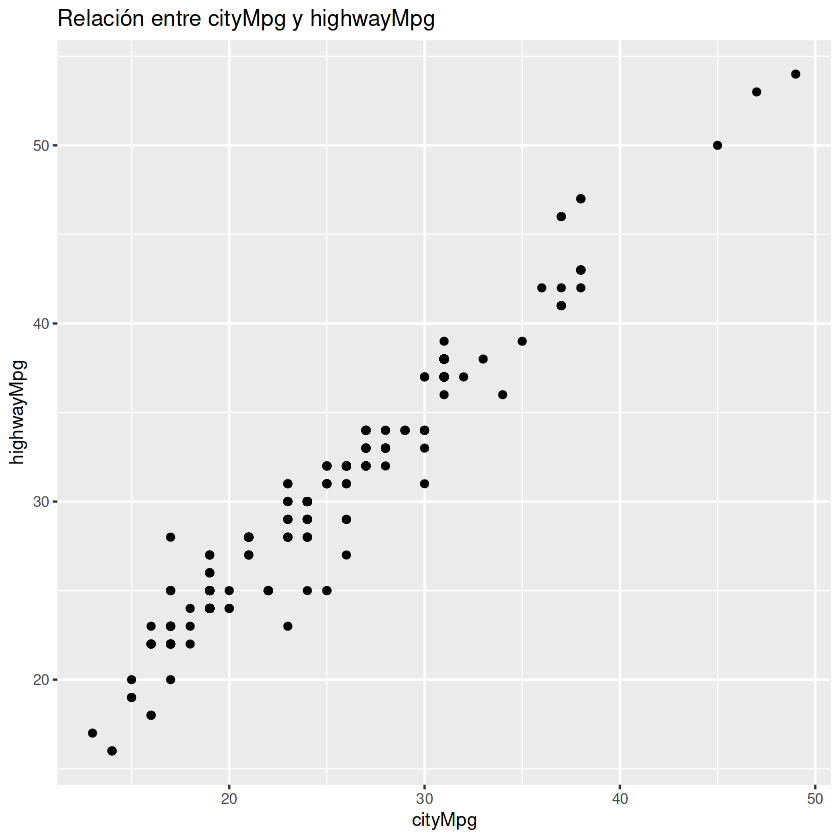

In [8]:
library(ggplot2)

ggplot(carIns_final, aes(x = cityMpg, y = highwayMpg)) +
  geom_point() +
  labs(x = "cityMpg", y = "highwayMpg") +
  ggtitle("Relación entre cityMpg y highwayMpg")

## (f) Show the distribution of cars by bodyStyle.

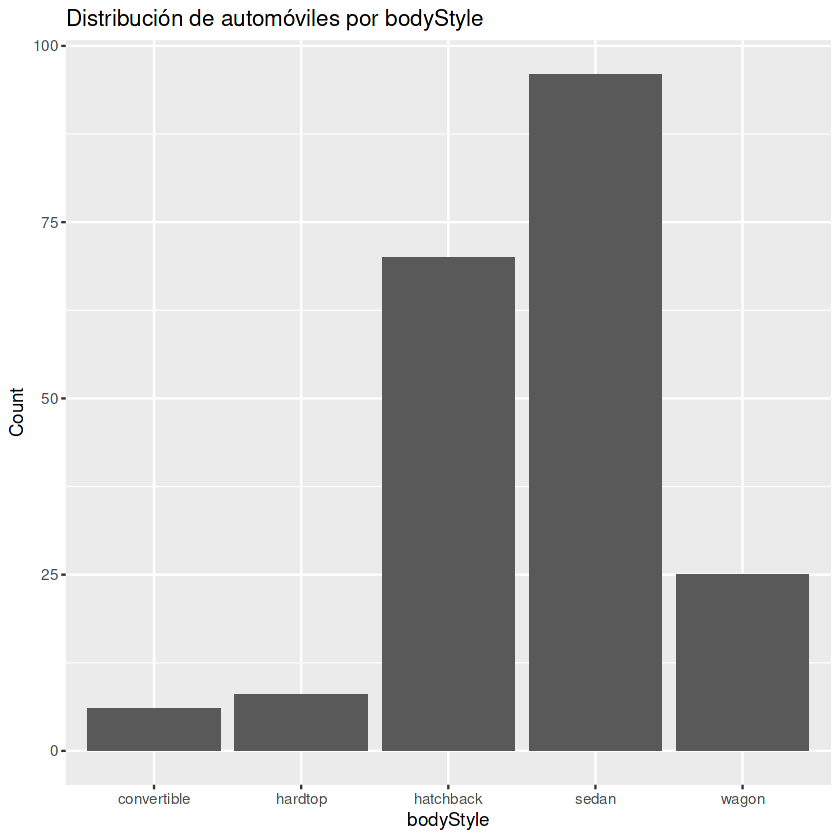

In [9]:
library(ggplot2)

ggplot(carIns_final, aes(x = bodyStyle)) +
  geom_bar() +
  labs(x = "bodyStyle", y = "Count") +
  ggtitle("Distribución de automóviles por bodyStyle")

## (g) Show the distribution of cars by price. Suggestion: create bins of width equal to 5000

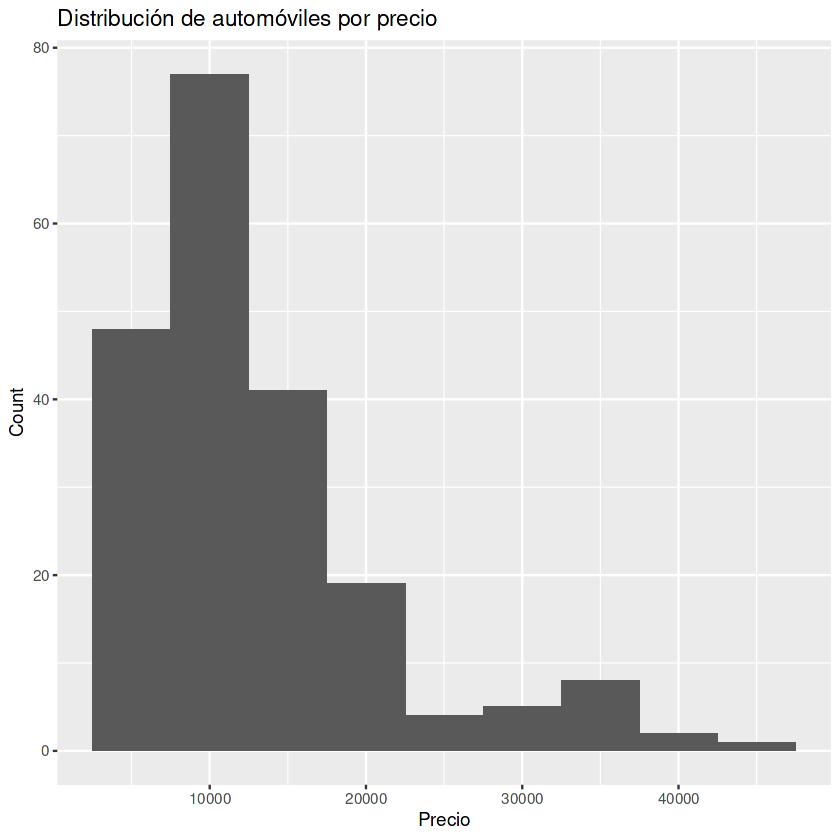

In [10]:
library(ggplot2)

ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000) +
  labs(x = "Precio", y = "Count") +
  ggtitle("Distribución de automóviles por precio")

## (h) Add the information of the density estimation to the previous graph.

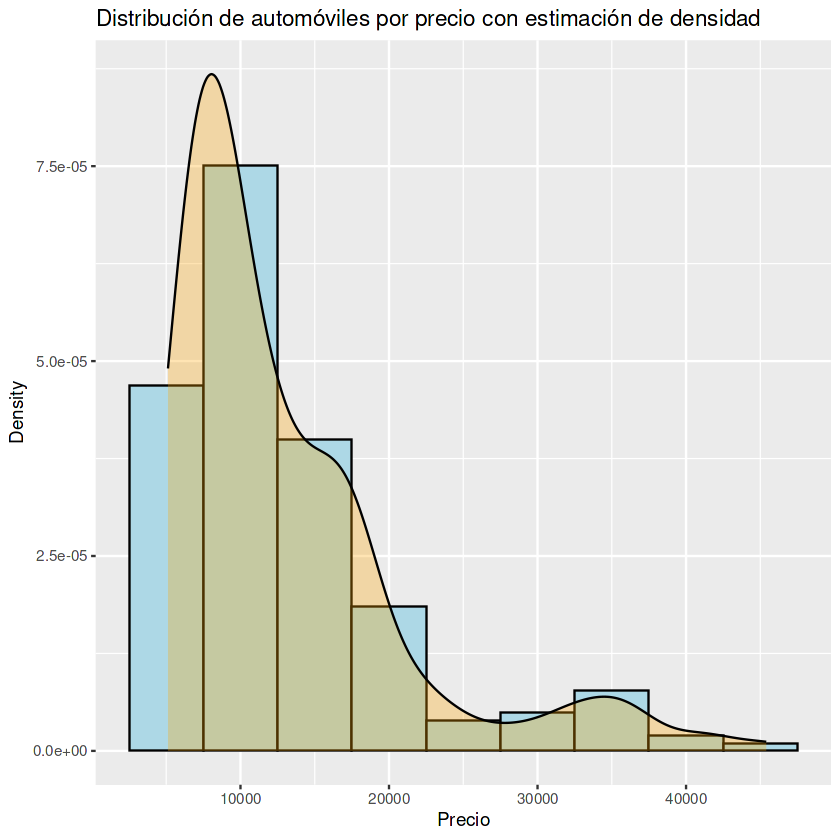

In [11]:
library(ggplot2)

ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, aes(y = after_stat(density)), fill = "lightblue", color = "black") +
  geom_density(alpha = 0.3, fill = "orange") +
  labs(x = "Precio", y = "Density") +
  ggtitle("Distribución de automóviles por precio con estimación de densidad")

## (i) Check (visually) if it is plausible to consider that price follows a normal distribution.


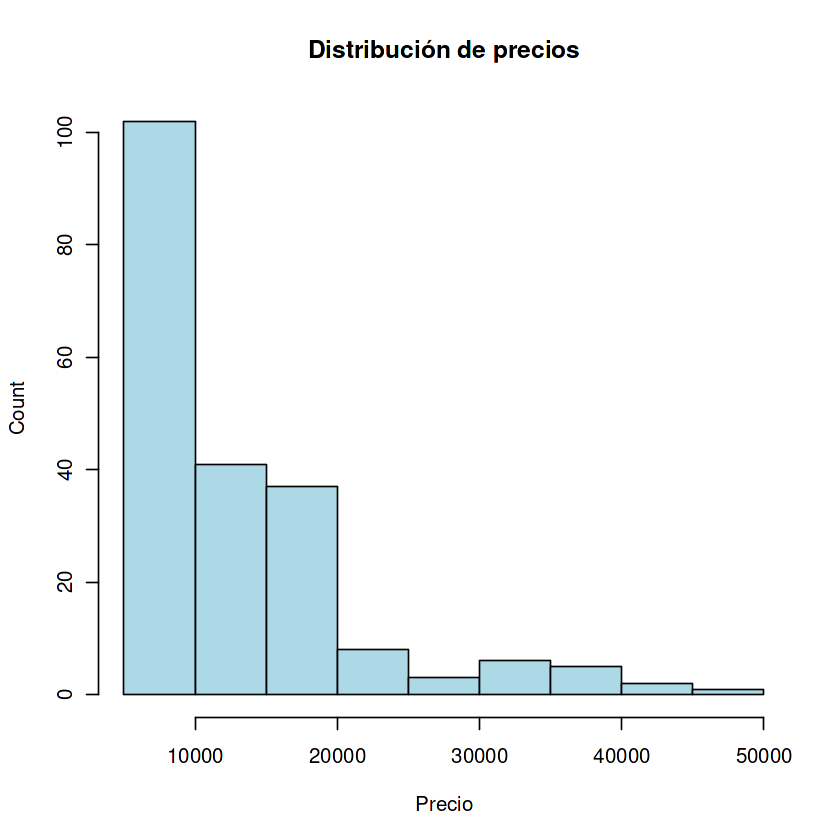

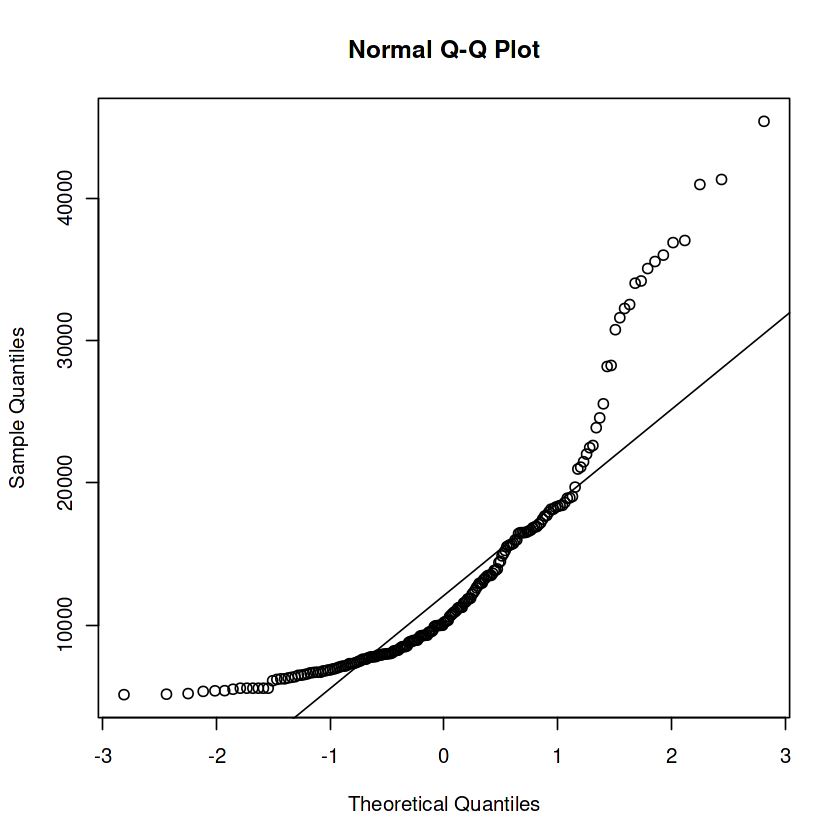

In [12]:
# Histograma de precio
hist(carIns_final$price, breaks = "FD", col = "lightblue", border = "black",
     xlab = "Precio", ylab = "Count",
     main = "Distribución de precios")

# Gráfico QQ de precio
qqnorm(carIns_final$price)
qqline(carIns_final$price)


## (j) Show the distribution of price by make attribute. Suggestion: use boxplots and the function coord_flip().

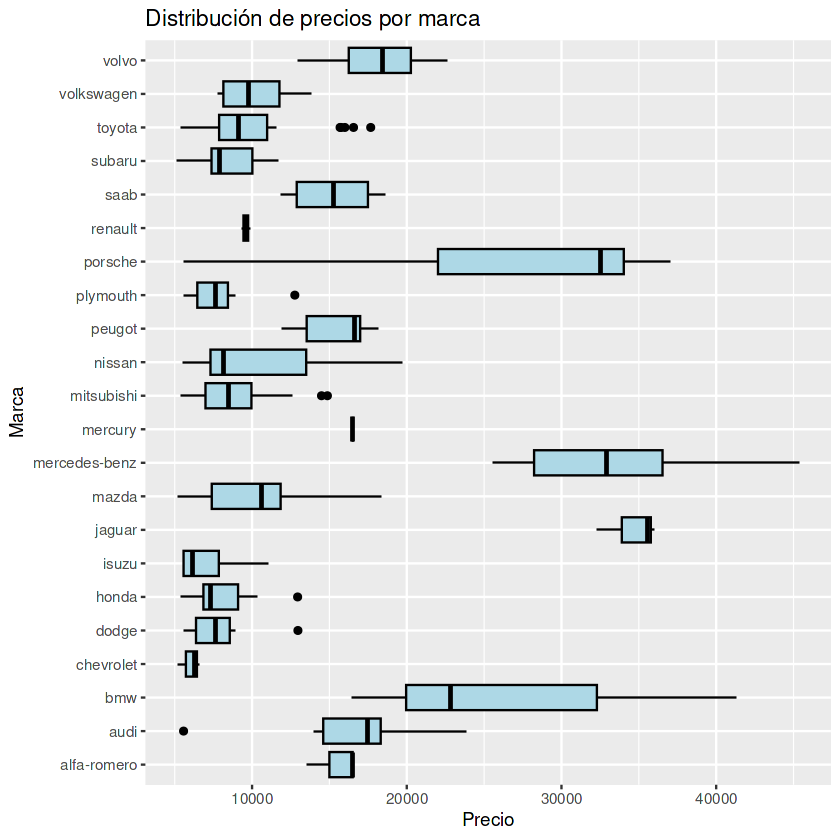

In [13]:
library(ggplot2)

ggplot(carIns_final, aes(x = make, y = price)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  coord_flip() +
  labs(x = "Marca", y = "Precio") +
  ggtitle("Distribución de precios por marca")

## (k) Show the distribution of price by nDoors attribute. Suggestion: use histograms.

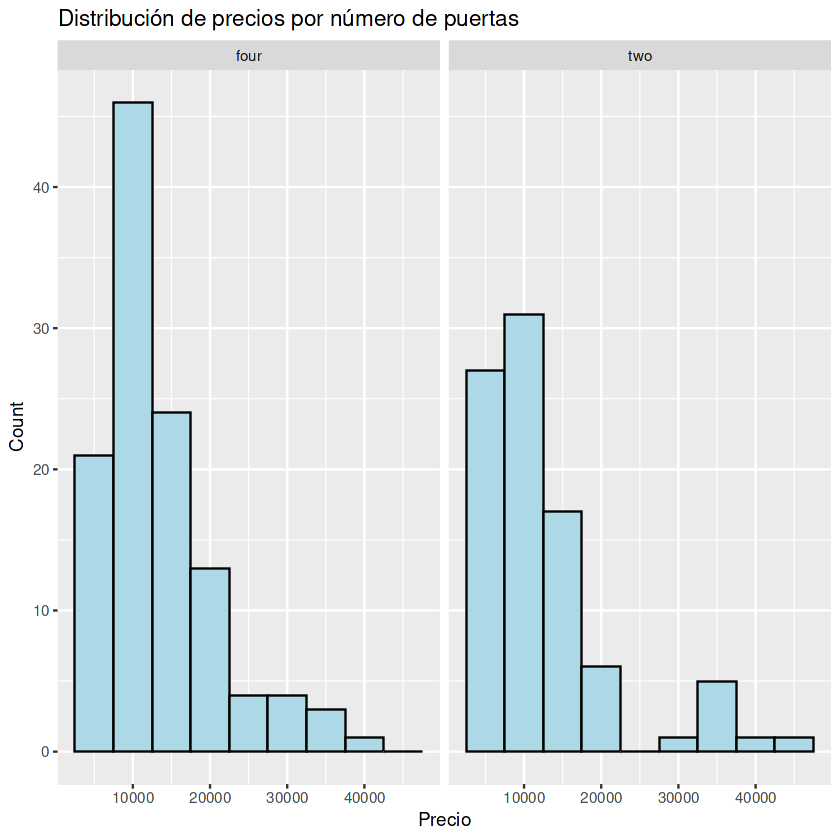

In [14]:
library(ggplot2)

ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, fill = "lightblue", color = "black") +
  facet_wrap(~ nDoors, ncol = 2) +
  labs(x = "Precio", y = "Count") +
  ggtitle("Distribución de precios por número de puertas")

## (l) Show the distribution of price by bodyStyle and nDoors attributes. Suggestion: use histograms.

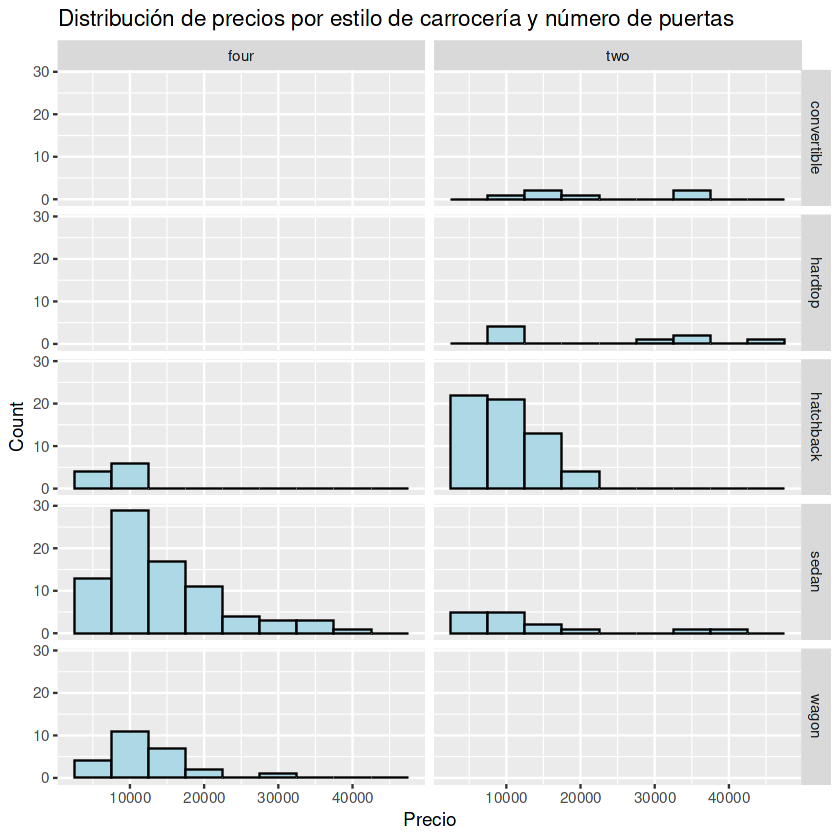

In [15]:
library(ggplot2)

ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, fill = "lightblue", color = "black") +
  facet_grid(bodyStyle ~ nDoors) +
  labs(x = "Precio", y = "Count") +
  ggtitle("Distribución de precios por estilo de carrocería y número de puertas")

## (m) Add the parameter scales="free_y" to the facet function in the previous graph.

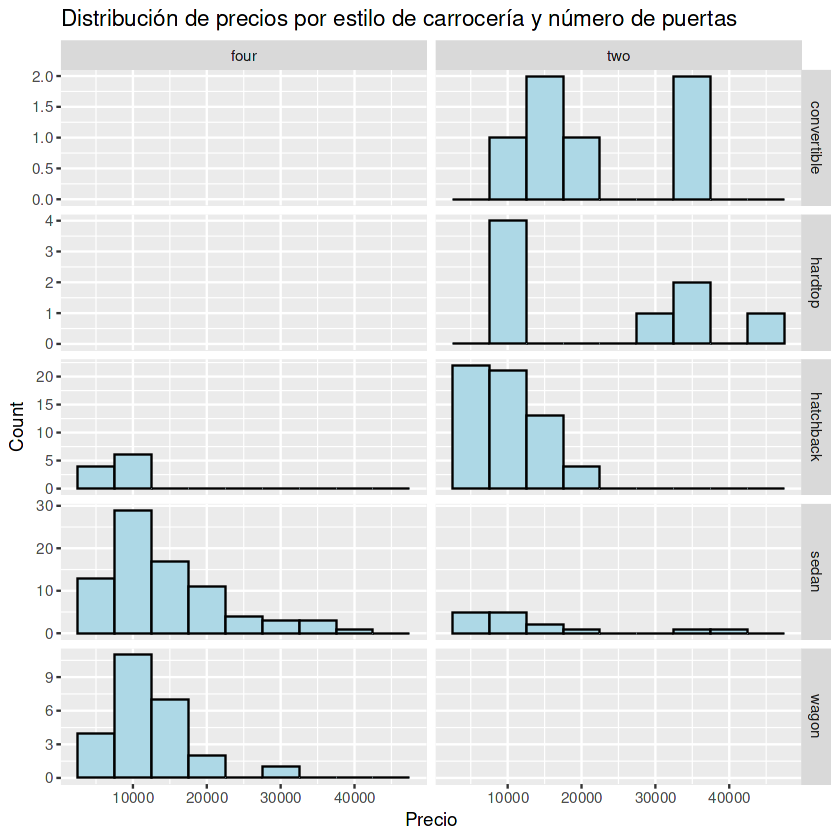

In [16]:
library(ggplot2)

ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, fill = "lightblue", color = "black") +
  facet_grid(bodyStyle ~ nDoors, scales = "free_y") +
  labs(x = "Precio", y = "Count") +
  ggtitle("Distribución de precios por estilo de carrocería y número de puertas")